# Regression Analysis of Real Estate Sales in 2002

### 許sir

## 資料說明
本資料共有522筆，包括: 房子銷售價格（sales price）；「房子內部特徵變項」；「房子外部特徵變項」；「地點特徵變項」

#### 房子內部特徵變項
- Finished square feet(X3): Finished area of residence (square feet)
- Number of bedrooms(X4): Total number of bedrooms in residence
- Number of bathrooms(X5): Total number of bathrooms in residence
- Air conditioning(X6): Presence or absence of air conditioning: 1 if yes; 0 otherwise
- Garage size(X7): Number of cars that garage will hold

#### 房子外部特徵變項
- Pool(X8): Presence or absence of swimming pool: 1 if yes; 0 otherwise
- Year built(X9): Year property was originally constructed
- Quality(X10): Index for quality of construction: 
    - 1 indicates high quality;
    - 2 indicates medium quality;
    - 3 indicates low quality
- Style(X11): Qualitative indicator of architectural style

#### 地點特徵變項
- Lot size(X12): Lot size (square feet)
- Adjacent to highway(X13): Presence or absence of adjacency to highway: 1 if yes; 0 otherwise

## [問題說明].
- 1. 欲探討在三大特徵變項之下，有哪些變數會影響房價?
- 2. 傳統認知中，建築風格(Style)和建築品質(Quality)會影響價格，究竟那些風格或品質能夠以不同的訂價策略進行定價

### [PART 1]. 資料準備與敘述性統計

依據資料集之說明，類別變項為: Air conditioning(X6)、Pool(X8)、Quality(X10)、Style(X11)、Adjacent to highway(X13)
- 其中，Air conditioning(X6)、Pool(X8)、Adjacent to highway(X13) 為Nominal scale，但coding變項為0/1
- Quality(X10)共有三種品質，而編碼方式為反向題
- Style(X11)共有七種建築風格

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
df = pd.read_csv('data/APPENC07.csv')
display(df.head(), df.tail(), df.shape)

,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,Style,Lot size,Adjacent to highway
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0


,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,Style,Lot size,Adjacent to highway
517,518,137000,1655,2,1,0,1,0,1935,3,1,54651,0
518,519,185000,1944,3,2,1,2,0,1939,3,6,17999,0
519,520,133500,1922,3,1,0,2,0,1950,3,1,14805,0
520,521,124000,1480,3,2,1,2,0,1953,3,1,28351,0
521,522,95500,1184,2,1,0,1,0,1951,3,1,14786,0


(522, 13)

#### [反向編碼]. 因為Quality(X10)共有三種品質，而原始編碼方式為反向題，所以我們將編碼方式改為:
- 1 indicates low quality;
- 2 indicates medium quality;
- 3 indicates high quality

In [3]:
df['Quality'].replace({1:3, 3:1}, inplace=True) #inplace=True才會寫入
df

,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,Style,Lot size,Adjacent to highway
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,137000,1655,2,1,0,1,0,1935,1,1,54651,0
518,519,185000,1944,3,2,1,2,0,1939,1,6,17999,0
519,520,133500,1922,3,1,0,2,0,1950,1,1,14805,0
520,521,124000,1480,3,2,1,2,0,1953,1,1,28351,0


In [4]:
df.dtypes #查詢資料型態

id                      int64
sales price             int64
Finished square feet    int64
Number of bedrooms      int64
Number of bathrooms     int64
Air conditioning        int64
Garage size             int64
Pool                    int64
Year built              int64
Quality                 int64
Style                   int64
Lot size                int64
Adjacent to highway     int64
dtype: object

In [5]:
#將三個應該是類別變數的轉為類別
df["Quality"] = df["Quality"].astype("category")
df["Style"] = df["Style"].astype("category")

df["id"] = df["id"].astype("category")

In [6]:
df.dtypes #查詢資料型態

id                      category
sales price                int64
Finished square feet       int64
Number of bedrooms         int64
Number of bathrooms        int64
Air conditioning           int64
Garage size                int64
Pool                       int64
Year built                 int64
Quality                 category
Style                   category
Lot size                   int64
Adjacent to highway        int64
dtype: object

In [7]:
df.head()

,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,Style,Lot size,Adjacent to highway
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0


In [8]:
df.describe() #基本統計量(只會列出屬量變數)

,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Lot size,Adjacent to highway
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,277894.147510,2260.626437,3.471264,2.641762,0.831418,2.099617,0.068966,1966.904215,24369.704981,0.021073
std,137923.397269,711.065933,1.014358,1.064169,0.374742,0.653970,0.253639,17.637924,11684.075549,0.143765
min,84000.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1885.000000,4560.000000,0.000000
25%,180000.000000,1701.250000,3.000000,2.000000,1.000000,2.000000,0.000000,1956.000000,17204.750000,0.000000
50%,229900.000000,2061.000000,3.000000,3.000000,1.000000,2.000000,0.000000,1966.000000,22200.000000,0.000000
75%,335000.000000,2636.250000,4.000000,3.000000,1.000000,2.000000,0.000000,1981.000000,26786.750000,0.000000
max,920000.000000,5032.000000,7.000000,7.000000,1.000000,7.000000,1.000000,1998.000000,86830.000000,1.000000


In [7]:
df['sales price'].groupby(df.Quality).describe() #不同的房屋品質與價格

,count,mean,std,min,25%,50%,75%,max
Quality,,,,,,,,
1,164.0,175018.292683,37916.792589,84000.0,153425.0,173750.0,189525.0,359900.0
2,290.0,273766.279310,85325.673674,140400.0,210000.0,251505.0,320000.0,675000.0
3,68.0,543610.647059,124032.385036,325000.0,468750.0,537000.0,609250.0,920000.0


In [8]:
df.corr() #相關係數

,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Lot size,Adjacent to highway
sales price,1.000000,0.819470,0.413324,0.683685,0.288596,0.577786,0.146612,0.555516,0.224169,-0.050968
Finished square feet,0.819470,1.000000,0.557838,0.755273,0.267950,0.533766,0.162396,0.441197,0.157525,-0.060625
Number of bedrooms,0.413324,0.557838,1.000000,0.583447,0.234651,0.316814,0.134542,0.268692,0.126538,-0.028744
Number of bathrooms,0.683685,0.755273,0.583447,1.000000,0.324760,0.489898,0.184153,0.512841,0.147007,-0.050928
Air conditioning,0.288596,0.267950,0.234651,0.324760,1.000000,0.319281,0.102361,0.425588,-0.105305,-0.040814
Garage size,0.577786,0.533766,0.316814,0.489898,0.319281,1.000000,0.108932,0.461760,0.152219,-0.001955
Pool,0.146612,0.162396,0.134542,0.184153,0.102361,0.108932,1.000000,0.059829,-0.036851,-0.039932
Year built,0.555516,0.441197,0.268692,0.512841,0.425588,0.461760,0.059829,1.000000,-0.100452,0.025777
Lot size,0.224169,0.157525,0.126538,0.147007,-0.105305,0.152219,-0.036851,-0.100452,1.000000,0.078447
Adjacent to highway,-0.050968,-0.060625,-0.028744,-0.050928,-0.040814,-0.001955,-0.039932,0.025777,0.078447,1.000000


findfont: Font family ['Noto Sans CJK TC'] not found. Falling back to DejaVu Sans.


Text(0.5, 1, 'Correlation Heatmap')

findfont: Font family ['Noto Sans CJK TC'] not found. Falling back to DejaVu Sans.


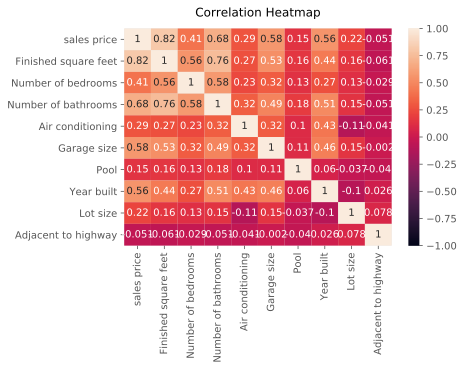

In [9]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### [PART 2]. 迴歸分析A

#### 如果我想知道，三組特徵變項（房子內部特徵變項、房子外部特徵變項與地點特徵變項）到底分別對房子銷售價格（sales price）有沒有影響，有多少解釋力？
- 將所有變數一次丟進去是行不通的，只會產生共線性以及讓 R-Square上升



### H1a: 「房子內部特徵變項」對 房子銷售價格（sales price）有顯著影響
- Finished square feet(X3): Finished area of residence (square feet)
- Number of bedrooms(X4): Total number of bedrooms in residence
- Number of bathrooms(X5): Total number of bathrooms in residence
- Air conditioning(X6): Presence or absence of air conditioning: 1 if yes; 0 otherwise
- Garage size(X7): Number of cars that garage will hold

In [10]:
#複製一組資料集來做下列的運算，避免做錯被覆蓋
df2 = df.copy() #整份資料要copy成另一份時

In [11]:
df2.head(10)

,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,Style,Lot size,Adjacent to highway
0,1,360000,3032,4,4,1,2,0,1972,2,1,22221,0
1,2,340000,2058,4,2,1,2,0,1976,2,1,22912,0
2,3,250000,1780,4,3,1,2,0,1980,2,1,21345,0
3,4,205500,1638,4,2,1,2,0,1963,2,1,17342,0
4,5,275500,2196,4,3,1,2,0,1968,2,7,21786,0
5,6,248000,1966,4,3,1,5,1,1972,2,1,18902,0
6,7,229900,2216,3,2,1,2,0,1972,2,7,18639,0
7,8,150000,1597,2,1,1,1,0,1955,2,1,22112,0
8,9,195000,1622,3,2,1,2,0,1975,1,1,14321,0
9,10,160000,1976,3,3,0,1,0,1918,1,1,32358,0


In [14]:
import statsmodels.api as sm #統計模式

In [12]:
X = df2[["Finished square feet", "Number of bedrooms", "Number of bathrooms","Air conditioning","Garage size"]]
y = df2["sales price"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     255.5
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          4.88e-137
Time:                        17:48:21   Log-Likelihood:                -6592.6
No. Observations:                 522   AIC:                         1.320e+04
Df Residuals:                     516   BIC:                         1.322e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -1.01e+05   1.44e+04     -7.000      0.000   -1.29e+05   -7.26e+04
Finished square feet   129.3685      7.476     17.304      0.000     114.681     144.056
Number of bedrooms   -1.454e+04   4060.252     -3.581      0.000   -2.25e+04   -6563.912
Number of bathrooms   1.905e+04   5003.064      3.808      0.000    9225.044    2.89e+04
Air conditioning      1.172e+04   9384.611      1.249      0.212   -6715.761    3.02e+04
Garage size           3.659e+04   6078.642      6.019      0.000    2.46e+04    4.85e+04
==============================================================================
Omnibus:                      140.376   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.300
Skew:                           1.267   Prob(JB):                     2.69e-93
Kurtosis:                       6.630   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [小結1]. 我們發現模式顯著，同時從參數估計表中可知，除了Air conditioning 之外，皆為顯著。同時Number of bedrooms為負向之影響。

### H1b: 「房子外部特徵變項」對 房子銷售價格（sales price）有顯著影響
- Pool(X8): Presence or absence of swimming pool: 1 if yes; 0 otherwise
- Year built(X9): Year property was originally constructed
- Quality(X10): Index for quality of construction:
    - 1 indicates high quality;
    - 2 indicates medium quality;
    - 3 indicates low quality
- Style(X11): Qualitative indicator of architectural style

In [13]:
df2['Quality'].value_counts() #確認一下Quality的次數分配

2    290
1    164
3     68
Name: Quality, dtype: int64

In [14]:
#對 Quality 取 2個 dummy variable
dummies = pd.get_dummies(df['Quality']).rename(columns=lambda x: 'Quality_' + str(x))
df2 = pd.concat([df2, dummies], axis=1)

# Quality_1 = low
# Quality_2 = medium
# Quality_3 = high

In [15]:
df2['Style'].value_counts() #確認一下Style的次數分配

1     214
7     136
3      64
2      58
6      18
5      18
4      11
11      1
10      1
9       1
Name: Style, dtype: int64

In [16]:
# Style總共有10種類別，所以要取9種dummy
dummies1 = pd.get_dummies(df['Style']).rename(columns=lambda x: 'Style_' + str(x))
df2 = pd.concat([df2, dummies1], axis=1)

In [19]:
df2['Quality_3'].value_counts() #確認一下Quality_high的次數分配(應該要有68筆)

0    454
1     68
Name: Quality_3, dtype: int64

In [20]:
df2['Quality_2'].value_counts() #確認一下Quality_medium的次數分配(應該要有290筆)

1    290
0    232
Name: Quality_2, dtype: int64

In [21]:
df2['Style_7'].value_counts() #確認一下Style_7的次數分配(應該要有136筆)

0    386
1    136
Name: Style_7, dtype: int64

In [22]:
df2['Style_2'].value_counts() #確認一下Style_2的次數分配(應該要有58筆)

0    464
1     58
Name: Style_2, dtype: int64

In [23]:
df2['Style_10'].value_counts() #確認一下Style_10的次數分配(應該要有1筆)

0    521
1      1
Name: Style_10, dtype: int64

In [17]:
X = df2[["Pool", "Year built", 
        "Quality_3","Quality_2",
        "Style_11","Style_10","Style_9","Style_7","Style_6","Style_5","Style_4","Style_3","Style_2"]]

y = df2["sales price"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     99.65
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.78e-130
Time:                        17:48:51   Log-Likelihood:                -6587.1
No. Observations:                 522   AIC:                         1.320e+04
Df Residuals:                     508   BIC:                         1.326e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.824e+06   4.85e+05     -5.824      0.000   -3.78e+06   -1.87e+06
Pool        3.256e+04   1.32e+04      2.470      0.014    6659.148    5.85e+04
Year built  1533.2964    248.155      6.179      0.000    1045.760    2020.833
Quality_3   3.059e+05   1.39e+04     22.065      0.000    2.79e+05    3.33e+05
Quality_2   7.401e+04   8887.976      8.327      0.000    5.66e+04    9.15e+04
Style_11   -1.262e+05   7.45e+04     -1.694      0.091   -2.73e+05    2.02e+04
Style_10     924.5847   7.58e+04      0.012      0.990   -1.48e+05     1.5e+05
Style_9    -1.327e+05   7.49e+04     -1.772      0.077    -2.8e+05    1.44e+04
Style_7     2.743e+04   9103.236      3.014      0.003    9548.337    4.53e+04
Style_6     7.117e+04   1.83e+04      3.880      0.000    3.51e+04    1.07e+05
Style_5     2.987e+04   1.85e+04      1.613      0.107   -6514.695    6.62e+04
Style_4     3.028e+04   2.32e+04      1.307      0.192   -1.52e+04    7.58e+04
Style_3    -2.126e+04   1.11e+04     -1.909      0.057   -4.31e+04     618.438
Style_2    -4.945e+04   1.16e+04     -4.247      0.000   -7.23e+04   -2.66e+04
==============================================================================
Omnibus:                      115.200   Durbin-Watson:                   1.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.228
Skew:                           1.037   Prob(JB):                     1.47e-76
Kurtosis:                       6.429   Cond. No.                     2.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [小結2]
- 我們發現房屋建築品質(high)and (medium)都比低(Low)有顯著影響
- 建築風格 Style_7、Style_6、Style_2對價格有顯著影響

### H1c 「地點特徵變項」對 房子銷售價格（sales price）有顯著影響
- Lot size(X12): Lot size (square feet)
- Adjacent to highway(X13): Presence or absence of adjacency to highway: 1 if yes; 0 otherwise

In [18]:
X = df2[["Lot size", "Adjacent to highway"]]
y = df2["sales price"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sales price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     15.10
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.24e-07
Time:                        17:49:05   Log-Likelihood:                -6903.0
No. Observations:                 522   AIC:                         1.381e+04
Df Residuals:                     519   BIC:                         1.382e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.132e+05   1.36e+04     15.667      0.000    1.87e+05     2.4e+05
Lot size                2.7100      0.505      5.364      0.000       1.717       3.703
Adjacent to highway -6.618e+04   4.11e+04     -1.612      0.108   -1.47e+05    1.45e+04
==============================================================================
Omnibus:                      150.568   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.397
Skew:                           1.525   Prob(JB):                     8.96e-74
Kurtosis:                       5.482   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [小結3]
- 模式顯著
- 從參數估計表中可知，Lot size對房屋價格有顯著影響 

## PART 2 總結
- 房子內部特徵變項: 
    - Finished square feet(X3)、
    - Number of bedrooms(X4)、
    - Number of bathrooms(X5)、
    - Garage size(X7) 對房屋價格皆為顯著
- 房子外部特徵變項: 
    - 建築品質(high)and (medium)都比低(Low)有顯著影響、
    - 建築風格 Style_7、Style_6、Style_2對價格有顯著影響
- 地點特徵變項: 
    - Lot size對房屋價格有顯著影響

### [PART 3]. ANOVA
依據資料集之說明，類別變項為: Air conditioning(X6)、Pool(X8)、Quality(X10)、Style(X11)、Adjacent to highway(X13)

- 其中，Air conditioning(X6)、Pool(X8)、Adjacent to highway(X13) 為Nominal scale，但coding變項為0/1
- Quality(X10)共有三種品質，而編碼方式為反向題
- Style(X11)共有七種建築風格

### [3-1]. ANOVA前的資料小處理


In [26]:
df2.head()

,id,sales price,Finished square feet,Number of bedrooms,Number of bathrooms,Air conditioning,Garage size,Pool,Year built,Quality,...,Style_1,Style_2,Style_3,Style_4,Style_5,Style_6,Style_7,Style_9,Style_10,Style_11
0,1,360000,3032,4,4,1,2,0,1972,2,...,1,0,0,0,0,0,0,0,0,0
1,2,340000,2058,4,2,1,2,0,1976,2,...,1,0,0,0,0,0,0,0,0,0
2,3,250000,1780,4,3,1,2,0,1980,2,...,1,0,0,0,0,0,0,0,0,0
3,4,205500,1638,4,2,1,2,0,1963,2,...,1,0,0,0,0,0,0,0,0,0
4,5,275500,2196,4,3,1,2,0,1968,2,...,0,0,0,0,0,0,1,0,0,0


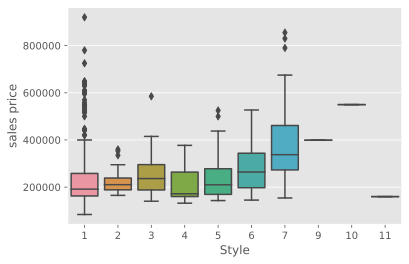

In [27]:
ax = sns.boxplot(x="Style", y="sales price", data=df2)


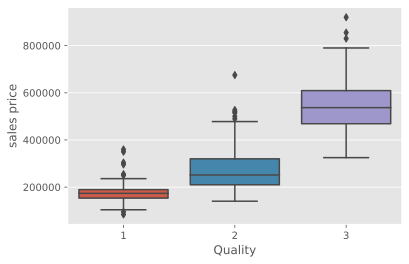

In [28]:
ax = sns.boxplot(x="Quality", y="sales price", data=df2)

In [29]:
len(df2)      #顯示資料總筆數

522

In [30]:
df2["Quality"] = df2["Quality"].astype(str)      #數值變成字串
df2["Style"] = df2["Style"].astype(str)      #數值變成字串

In [31]:
df2.dtypes #確認資料型態

id                      category
sales price                int64
Finished square feet       int64
Number of bedrooms         int64
Number of bathrooms        int64
Air conditioning           int64
Garage size                int64
Pool                       int64
Year built                 int64
Quality                   object
Style                     object
Lot size                   int64
Adjacent to highway        int64
Quality_1                  uint8
Quality_2                  uint8
Quality_3                  uint8
Style_1                    uint8
Style_2                    uint8
Style_3                    uint8
Style_4                    uint8
Style_5                    uint8
Style_6                    uint8
Style_7                    uint8
Style_9                    uint8
Style_10                   uint8
Style_11                   uint8
dtype: object

In [32]:
df2.isnull().any()                    #迅速查看是否有遺失值(大筆數資料)

id                      False
sales price             False
Finished square feet    False
Number of bedrooms      False
Number of bathrooms     False
Air conditioning        False
Garage size             False
Pool                    False
Year built              False
Quality                 False
Style                   False
Lot size                False
Adjacent to highway     False
Quality_1               False
Quality_2               False
Quality_3               False
Style_1                 False
Style_2                 False
Style_3                 False
Style_4                 False
Style_5                 False
Style_6                 False
Style_7                 False
Style_9                 False
Style_10                False
Style_11                False
dtype: bool

In [35]:
df3 = df2.rename(columns={'sales price': 'Price'}) #ANOVA的變數名稱必須大寫

## [3-2]. Two-Way ANOVA: 不同建築風格的訂價決策

### H3a: 不同建築風格及建物品質對房屋價格有影響

In [36]:
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
#formula = 'sales price ~ C(Quality) + C(Style)'
#lm = ols('sales price ~ C(Quality) + C(Style)', df2).fit()
#print(lm.summary())


formula = 'Price ~ C(Quality) + C(Style) + C(Quality):C(Style)'
model = ols(formula, df3).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                           sum_sq     df          F        PR(>F)
C(Quality)           4.054280e+11    2.0  35.836267  4.099550e-09
C(Style)             6.870648e+11    9.0  13.495662  1.873397e-10
C(Quality):C(Style)  3.153612e+11   18.0   3.097239  1.894091e-04
Residual             2.828336e+12  500.0        NaN           NaN


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 13
  'rank is %d' % (J, J_), ValueWarning)


In [38]:
df3.pivot_table('Price', index='Style', columns='Quality') #樞紐分析表 (數字內容為平均數)

Quality,1,2,3
Style,,,
1,169247.321429,256456.428571,577850.000000
10,NaN,NaN,549900.000000
11,NaN,159900.000000,NaN
2,194355.555556,222439.458333,335000.000000
3,177004.545455,255017.647059,460500.000000
4,162671.428571,313637.500000,NaN
5,174720.000000,292355.333333,512500.000000
6,225794.444444,334711.111111,NaN
7,188833.333333,316820.212766,535815.944444


資料參考: https://www.statsmodels.org/devel/examples/notebooks/generated/interactions_anova.html

### [3-3]. Tukey test 事後比較: 以建築風格為例

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df3['Price'], df3['Style'])
tkresult = mc.tukeyhsd()
 
print(tkresult)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
     1     10   301539.743 0.3409 -101190.9351 704270.4211  False
     1     11   -88460.257    0.9 -491190.9351 314270.4211  False
     1      2  -28337.9467 0.8825   -87817.259  31141.3656  False
     1      3    -329.7883    0.9  -57573.5143  56913.9378  False
     1      4  -30792.0752    0.9 -155011.7534   93427.603  False
     1      5    3102.6319    0.9  -95503.3412  101708.605  False
     1      6   31892.5208    0.9  -66713.4523 130498.4939  False
     1      7  120782.9342  0.001   76721.3557 164844.5126   True
     1      9   150639.743    0.9 -252090.9351 553370.4211  False
    10     11    -390000.0 0.4734 -958221.1149 178221.1149  False
    10      2 -329877.6897 0.2267 -735119.6235  75364.2442  False
    10      3 -301869.5312 0.3475 -706789.3758 103050.3133  False
    10    

### 由上表可以看出
- 建築風格 7 和其他(1、2、3、4、5)有在價格上有差異
- 其中，建築風格 7 和 建築風格 4 在平均價格上的差異達151575.0094 

### [PART 4]. 卡方列聯表初探


- 從ANOVA中，我們可以知道 Style 及 Quality 存在交互作用
- 又由PART 2的分析，我們知道Quality(X10)以及Style_7、Style_6、Style_2對價格有顯著影響

- 同時依據資料集之說明，類別變項為: Air conditioning(X6)、Pool(X8)、Quality(X10)、Style(X11)、Adjacent to highway(X13)
    - 其中，Air conditioning(X6)、Pool(X8)、Adjacent to highway(X13) 為Nominal scale，但coding變項為0/1
    - Quality(X10)共有三種品質，而編碼方式為反向題
    - Style(X11)共有七種建築風格

In [40]:
Cross1 = pd.crosstab(df3['Style'], df3['Quality']) #建立交叉列聯表
Cross1

Quality,1,2,3
Style,,,
1,112,77,25
10,0,0,1
11,0,1,0
2,9,48,1
3,11,51,2
4,7,4,0
5,10,6,2
6,9,9,0
7,6,94,36


In [42]:
df2.pivot_table('sales price', index='Style', columns='Quality') #樞紐分析表 (數字內容為房價平均數)

Quality,1,2,3
Style,,,
1,169247.321429,256456.428571,577850.000000
10,NaN,NaN,549900.000000
11,NaN,159900.000000,NaN
2,194355.555556,222439.458333,335000.000000
3,177004.545455,255017.647059,460500.000000
4,162671.428571,313637.500000,NaN
5,174720.000000,292355.333333,512500.000000
6,225794.444444,334711.111111,NaN
7,188833.333333,316820.212766,535815.944444


### 這組的資料集並不適合卡方分析，理由是過多的"空組"，除非採用併組之方式

>## [附件1]. 迴歸分析B

### H2a: 「地點特徵變項」是否同時對房子銷售價格（sales price）有影響

In [25]:
#複製一組資料集來做下列的運算，避免做錯被覆蓋
df3 = df.copy() #整份資料要copy成另一份時

In [26]:
df3.rename(columns={'Adjacent to highway':'Adj_highway', 
                  'Lot size':'L_size',
                  'sales price':'price' }, inplace = True) #把變數名稱縮短一點，懶得打很多字

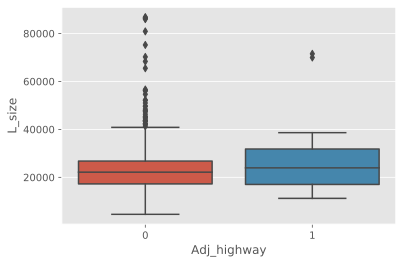

In [27]:
sns.boxplot(x = 'Adj_highway', y= 'L_size', data = df3) #Box-Plot(第二四分位數為中位數)

由 Hypathsis 3 已知，Lot size對sales price有顯著影響(P-value< 0.01)，Adjacent to highway則無影響(P-value> 0.05)，意即Lot size之主效果顯著。故以 **交互作用(interaction)** 呈現

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [29]:
df3['high_size'] = df3.Adj_highway * df3.L_size #組合一個新的變數(交互作用)

In [30]:
model = smf.ols(formula='price ~ Adj_highway + L_size + high_size', data=df3).fit()
summary = model.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.092e+05,1.4e+04,14.978,0.000,1.82e+05,2.37e+05
Adj_highway,1.352e+04,7.5e+04,0.180,0.857,-1.34e+05,1.61e+05
L_size,2.8761,0.522,5.513,0.000,1.851,3.901
high_size,-2.6379,2.079,-1.269,0.205,-6.722,1.446


### [小結]. 
- 由上述可知，Model-5 之主效果Lot size對sales price仍有顯著影響(P-value< 0.01)，
- 但交互效果(Adjacent to highway * Lot size)不顯著 (P-value> 0.05)